In [ ]:
import json
import tqdm
f = open('/content/drive/MyDrive/DLNLPA2/train-v2.0.json')

data = json.load(f)
flg=0
for aid in tqdm.tqdm(range(len(data['data']))):
    paragraphs = data['data'][aid]['paragraphs']
                 
    for pid in range(len(paragraphs)):
        qas = paragraphs[pid]['qas']
        for qid in range(len(qas)):
            if(qid==0):
                first_bool= qas[qid]['is_impossible']
            if(qas[qid]['is_impossible']!=first_bool):
                second_bool=qas[qid]['is_impossible']
                flg=1
                break
        if(flg==1):
            break
    if(flg==1):
        break  



  1%|          | 4/442 [00:00<00:00, 719.31it/s]


In [ ]:

Answerable_questions=[]
Answerable_questions_context=[]
Answerable_questions_id=[]
count_AQ=0
Unanswerable_questions=[]
Unanswerable_questions_id=[]
Unanswerable_questions_context=[]
count_UQ=0
Answers=[]
count_A=0
count_PA=0
Plausible_Answers=[]
for aid in tqdm.tqdm(range(len(data['data']))):
    paragraphs = data['data'][aid]['paragraphs']
                 
    for pid in range(len(paragraphs)):
        qas = paragraphs[pid]['qas']
        context=paragraphs[pid]['context']
        for qid in range(len(qas)):
            flag=0
            if(bool(qas[qid]['is_impossible'])==first_bool):
                question_id=qas[qid]['id']
                question = qas[qid]['question']
                ques=question.split()

                if((ques[0]=='what' or ques[0]=='who' or ques[0]=='when' or ques[0]=='where' or ques[0]=='What' or ques[0]=='Who' or ques[0]=='When' or ques[0]=='Where') or (len(ques)>1 and (ques[1]=='what' or ques[1]=='who' or ques[1]=='when' or ques[1]=='where' or ques[1]=='What' or ques[1]=='Who' or ques[1]=='When' or ques[1]=='Where'))):

                    temp_ans=qas[qid]['answers'][0]['text']
                    t=temp_ans.split()
                    if(len(t)<=5):
                        Answerable_questions.append(''.join([i if ord(i) < 128 else '' for i in question]))
                        Answerable_questions_id.append(question_id)
                        Answerable_questions_context.append(''.join([i if ord(i) < 128 else '' for i in context]))
                        count_AQ=count_AQ+1
                        Answers.append(''.join([i if ord(i) < 128 else '' for i in temp_ans]))
                        count_A=count_A+1

            if(bool(qas[qid]['is_impossible'])==second_bool):
                
                question = qas[qid]['question']
                ques=question.split()
                if((ques[0]=='what' or ques[0]=='who' or ques[0]=='when' or ques[0]=='where' or ques[0]=='What' or ques[0]=='Who' or ques[0]=='When' or ques[0]=='Where') or (len(ques)>1 and (ques[1]=='what' or ques[1]=='who' or ques[1]=='when' or ques[1]=='where' or ques[1]=='What' or ques[1]=='Who' or ques[1]=='When' or ques[1]=='Where'))):
                    try:
                      temp_ans=qas[qid]['plausible_answers'][0]['text']
                    except:
                      temp_ans=""
                      print("a")
                    t=temp_ans.split()
                    if(len(t)<=5):
                        Unanswerable_questions.append(question)
                        Unanswerable_questions_id.append(question_id)
                        Unanswerable_questions_context.append(context)
                        Plausible_Answers.append(temp_ans)
            

#print(Answerable_questions)

# Closing file
f.close()

100%|██████████| 442/442 [00:06<00:00, 66.31it/s]


In [ ]:
# Answerable_questions_id
# Answerable_questions
# Answerable_questions_context
# Answers
input=[]
for ques,context in zip(Answerable_questions,Answerable_questions_context):
  input.append(ques.strip()+" <SEP> "+context.strip())

In [ ]:
for txt in Answerable_questions:
  if(len(txt.split())>100):
    print(txt)
    break

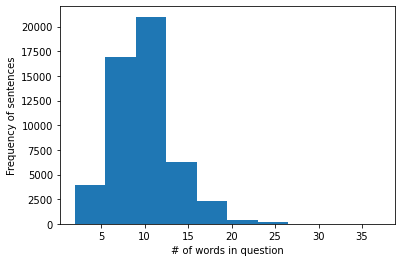

In [ ]:
import math
# sum([len(txt) for txt in input_texts])/len([len(txt) for txt in input_texts])
import numpy as np
import matplotlib.pyplot as plt
x =[len(str(txt).split()) for txt in Answerable_questions]
n, bins, patches = plt.hist(x)
plt.xlabel("# of words in question")
plt.ylabel("Frequency of sentences")
plt.show()

In [ ]:
other_input=[]
for ques,context in zip(Unanswerable_questions,Unanswerable_questions_context):
  other_input.append(ques.strip()+" <SEP> "+context.strip())

In [ ]:
import pandas as pd
data = {'id':Answerable_questions_id,
        'input':input,
        'output':Answers}
df = pd.DataFrame(data)

In [ ]:
df.to_csv("/content/drive/MyDrive/DLNLPA2/dev.csv")

In [ ]:
import pandas as pd
data = {'id':Answerable_questions_id[:1000]+Unanswerable_questions_id[:1000],
        'input':input[:1000]+other_input[:1000],
        'output':Answers[:1000]+Plausible_Answers[:1000]}
df = pd.DataFrame(data)

In [ ]:
df.to_csv("/content/drive/MyDrive/DLNLPA2/all_small_dev.csv")

In [ ]:
len(Plausible_Answers)

3505